In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
# Imports
import os
import pandas as pd
import hdbscan
from oma_tracking.oma_clustering import ModeClusterer
import datetime

In [53]:
PROJECT_PATH = os.path.dirname(os.getcwd())

data_path = os.path.join(PROJECT_PATH, 'data', 'Elia', 'OMA_7.parquet') # Change to local data path
start = datetime.datetime(2022, 4, 2)
stop = datetime.datetime(2022, 4, 8)

oma_data = pd.read_parquet(data_path)[start:stop]
sensor = 'mpe_MO_04_ACC3_Z'
sensor_data = pd.DataFrame.from_records(oma_data[sensor].explode().dropna().tolist()).set_index(oma_data[sensor].explode().dropna().index)

C:\Users\Max\AppData\Local\Temp\ipykernel_27876\1340803991.py:7: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  oma_data = pd.read_parquet(data_path)[start:stop]


In [54]:
mc = ModeClusterer(
    eps = 5,
    min_samples = 100,
    multipliers = {"frequency": 40, "size": 0.5, "damping": 1},
    index_divider = 20000,
    cols = ['frequency', 'size', 'damping'],
    min_size = 5.0,
    max_damping = 5.0
    )

In [55]:
mc.fit(sensor_data)

In [56]:
clustered_modes = mc.predict(min_cluster_size=200)
len(clustered_modes.labels.unique())

22

In [57]:
mc.dbscan_data

,frequency,size,damping,labels
timestamp,,,,
2022-04-02 00:00:00+00:00,3.885219,81,0.262001,0
2022-04-02 00:00:00+00:00,4.371079,60,0.623528,1
2022-04-02 00:00:00+00:00,4.942809,66,0.191044,2
2022-04-02 00:00:00+00:00,5.766566,31,0.377394,3
2022-04-02 00:00:00+00:00,5.827136,11,0.689008,3
...,...,...,...,...
2022-04-08 00:00:00+00:00,62.807814,31,0.325924,18
2022-04-08 00:00:00+00:00,63.058741,13,0.036753,23
2022-04-08 00:00:00+00:00,63.111439,12,0.036839,23


Text(0, 0.5, 'Frequency (Hz)')

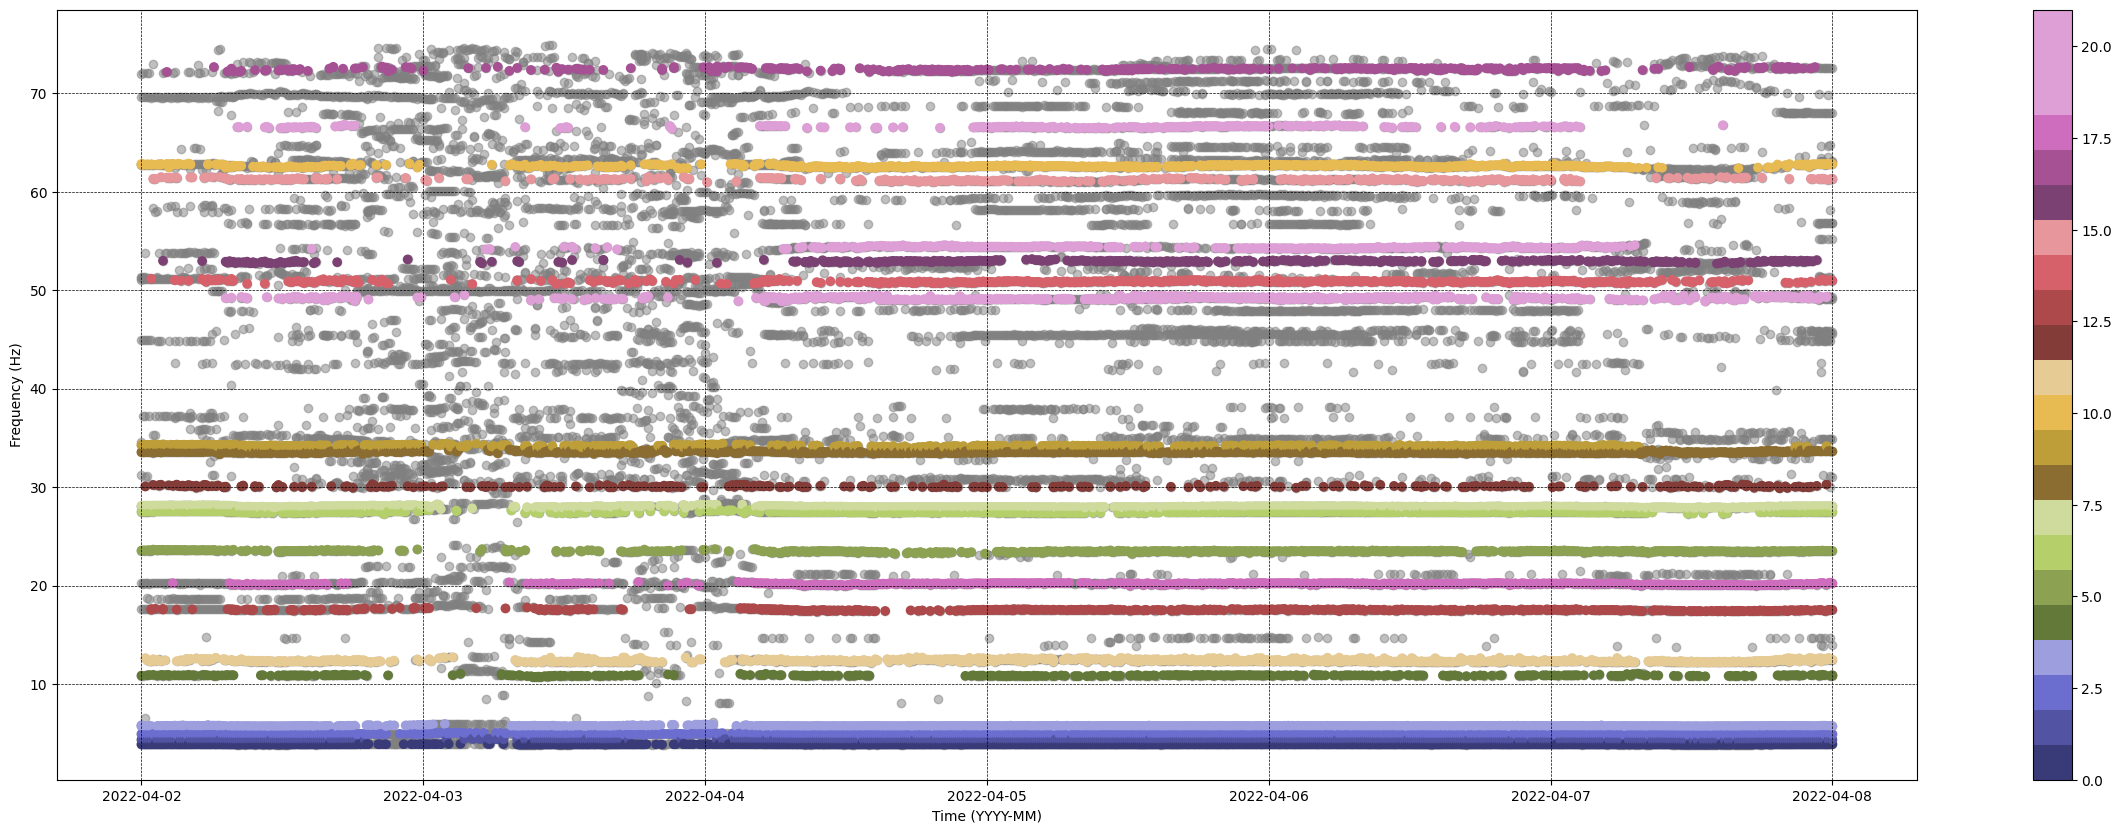

In [58]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize = (30,10))
plt.scatter(sensor_data.index, sensor_data['frequency'], alpha=0.5, color='grey')

tab = plt.get_cmap('tab20b')
first_colors = tab(range(0,len(clustered_modes.labels.unique()),1))
cmap = ListedColormap(first_colors)

plt.scatter(clustered_modes.index, clustered_modes['frequency'], c=clustered_modes['labels'], cmap = cmap)
plt.grid(True, color='k', linestyle='--', linewidth=0.5)
cbar = plt.colorbar()
plt.xlabel('Time (YYYY-MM)')
plt.ylabel('Frequency (Hz)')
#plt.title('Tracked modes in the Z (SS) direction')

C:\Users\Max\AppData\Local\Temp\ipykernel_27876\2109964085.py:7: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  oma_data = pd.read_parquet(data_path)[start:stop]


(26.0, 35.0)

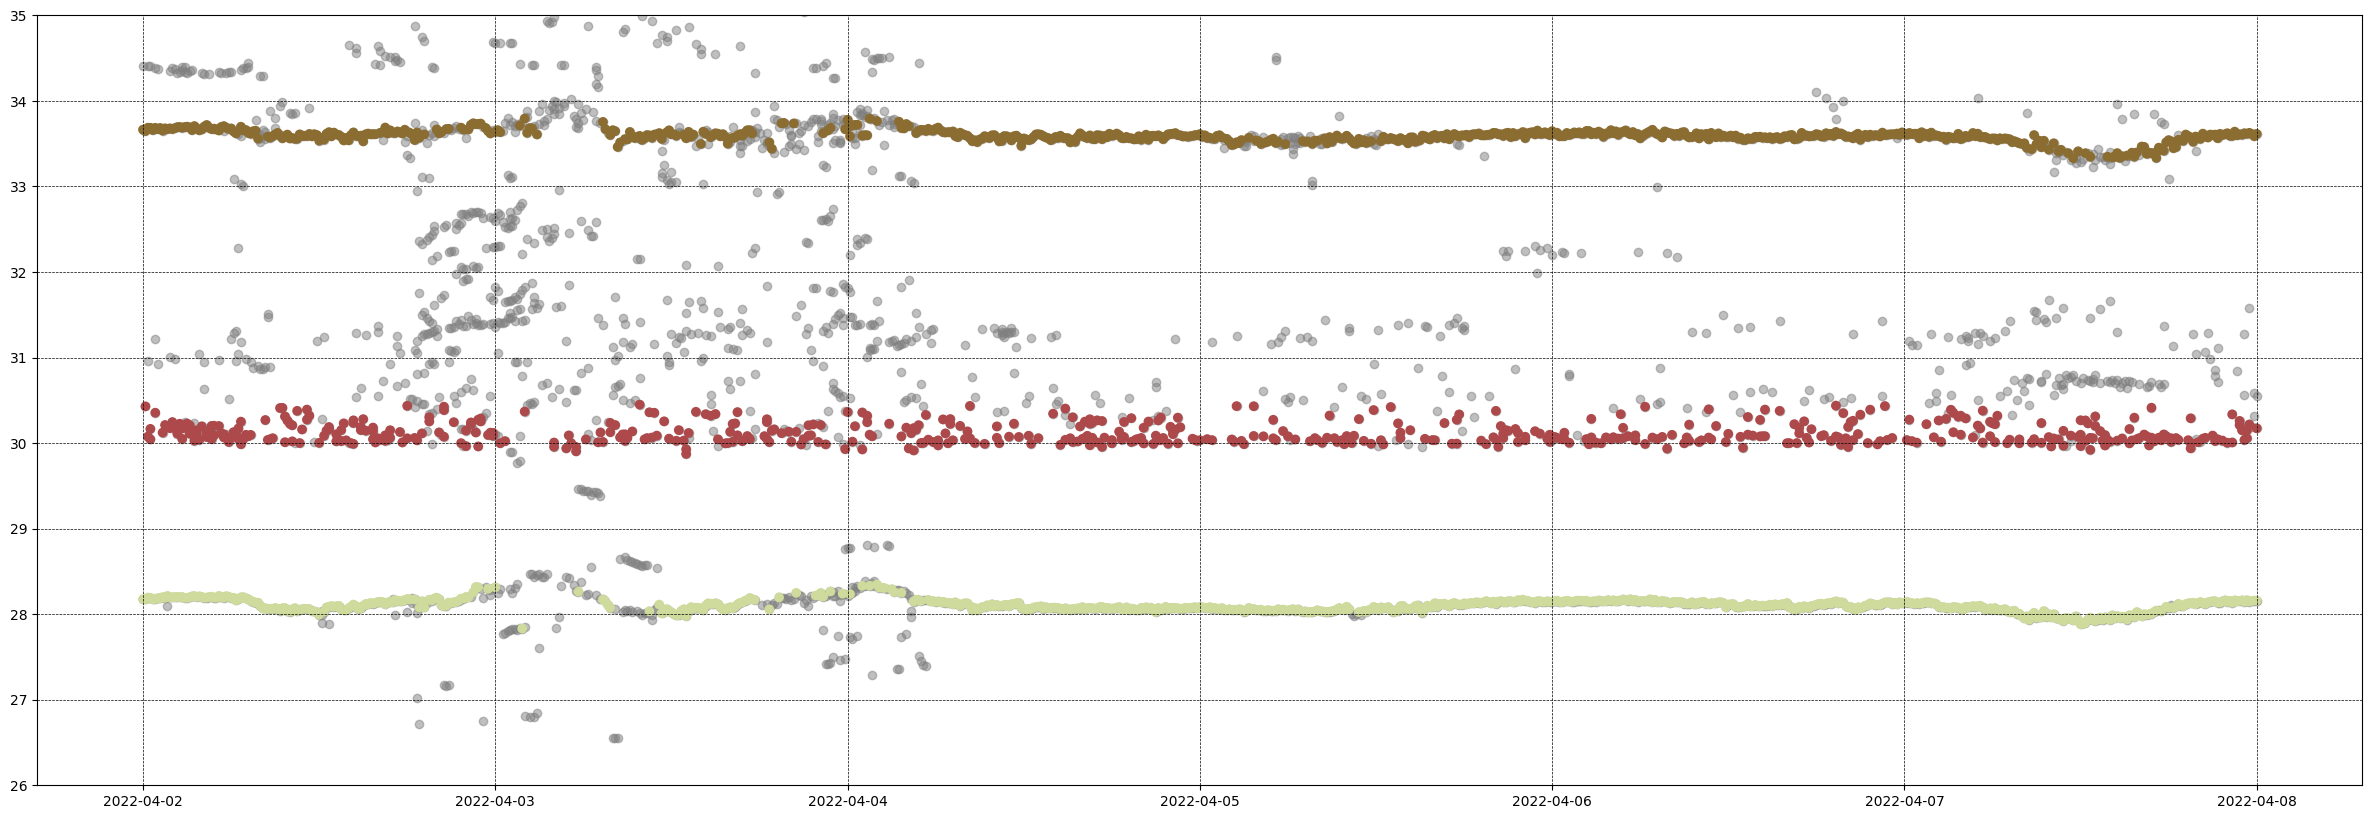

In [60]:
PROJECT_PATH = os.path.dirname(os.getcwd())

data_path = os.path.join(PROJECT_PATH, 'data', 'Elia', 'OMA_7.parquet') # Change to local data path
start = datetime.datetime(2022, 4, 2)
stop = datetime.datetime(2022, 4, 8)

oma_data = pd.read_parquet(data_path)[start:stop]
sensor = 'mpe_MO_04_ACC5_Z'
sensor_data = pd.DataFrame.from_records(oma_data[sensor].explode().dropna().tolist()).set_index(oma_data[sensor].explode().index)

mc = ModeClusterer(
    eps = 5,
    min_samples = 100,
    multipliers = {"frequency": 40, "size": 0.5, "damping": 1},
    index_divider = 20000,
    cols = ['frequency', 'size', 'damping'],
    min_size = 5.0,
    max_damping = 5.0
    )

mc.fit(sensor_data)
clustered_modes = mc.predict(min_cluster_size=350)

fig = plt.figure(figsize = (30,10))
plt.scatter(sensor_data.index, sensor_data['frequency'], alpha=0.5, color='grey')

tab = plt.get_cmap('tab20b')
first_colors = tab(range(0,len(clustered_modes.labels.unique()),1))
cmap = ListedColormap(first_colors)

plt.scatter(clustered_modes.index, clustered_modes['frequency'], c=clustered_modes['labels'], cmap = cmap)
plt.grid(True, color='k', linestyle='--', linewidth=0.5)
plt.ylim(26,35)

In [61]:
PROJECT_PATH = os.path.dirname(os.getcwd())

data_path = os.path.join(PROJECT_PATH, 'data', 'Elia', 'OMA_7.parquet') # Change to local data path
start = datetime.datetime(2022, 4, 2)
stop = datetime.datetime(2022, 4, 8)

oma_data = pd.read_parquet(data_path)[start:stop]
sensor = 'mpe_MO_04_ACC4_Z'
sensor_data = pd.DataFrame.from_records(oma_data[sensor].explode().dropna().tolist()).set_index(oma_data[sensor].explode().index)

mc = ModeClusterer(
    eps = 5,
    min_samples = 100,
    multipliers = {"frequency": 40, "size": 0.5, "damping": 1},
    index_divider = 20000,
    cols = ['frequency', 'size', 'damping'],
    min_size = 5.0,
    max_damping = 5.0
    )

mc.fit(sensor_data)
clustered_modes = mc.predict(min_cluster_size=350)

C:\Users\Max\AppData\Local\Temp\ipykernel_27876\3855662672.py:7: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  oma_data = pd.read_parquet(data_path)[start:stop]


(26.0, 28.5)

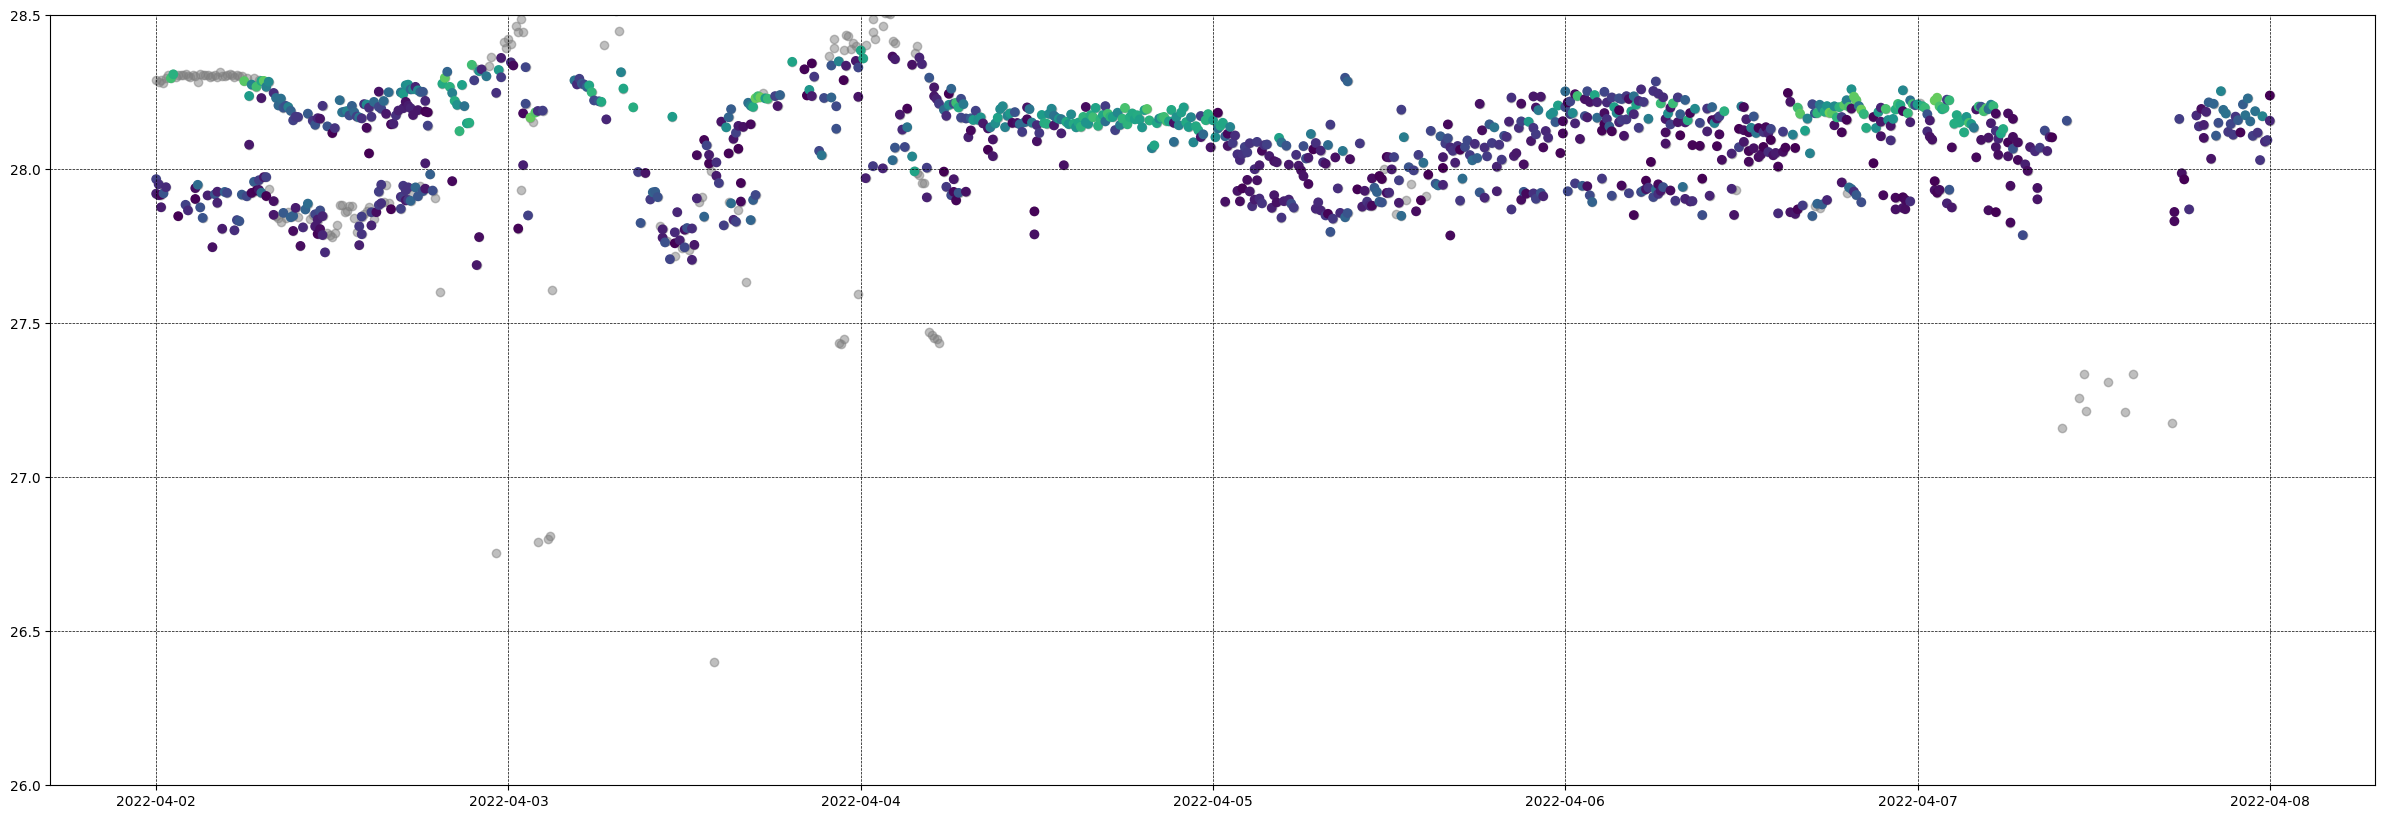

In [63]:
fig = plt.figure(figsize = (30,10))
plt.scatter(sensor_data.index, sensor_data['frequency'], alpha=0.5, color='grey')

plt.scatter(clustered_modes.index, clustered_modes['frequency'], c=clustered_modes['size'])
plt.grid(True, color='k', linestyle='--', linewidth=0.5)
plt.ylim(26,28.5)